# Image Compression

In this notebook, we use SVD to compute a low-rank approximation to a given image (aka matrix). Below, we demonstrate the pipeline to obtain various approximations for grayscale and color images.

Import Statements

In [1]:
from matplotlib.image import imread # To load the image
import matplotlib.pyplot as plt
import numpy as np

# Size of image to plot
plt.rcParams['figure.figsize'] = [5,5]

### Black and White

First, we demonstrate our approximation for a black and white image

In [30]:
image_path = 'images/rattlesnake/rattlesnake.png'

In [31]:
# Converts the original image to numpy array
if image_path.endswith(".jpeg") or image_path.endswith(".jpg"):
  # normalize to [0, 1]
  image = imread(image_path).astype(float) / 255.0
else:
  image = imread(image_path)

if len(image.shape) == 3:
    # Convert RGB to grayscale
    X = np.mean(image, axis=-1)
else:
    X = image

parameters = X.shape[0] * X.shape[1]
print(f"Image Shape: {X.shape}")
print(f"Parameters in Original Image: {parameters}")

Image Shape: (960, 1280)
Parameters in Original Image: 1228800


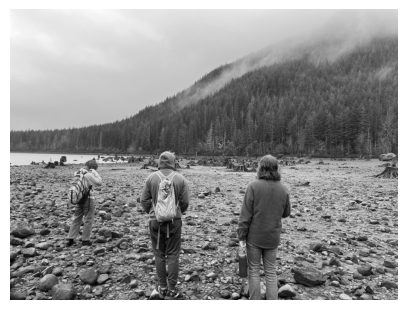

In [32]:
# Display the uncompressed image (in black and white)
img = plt.imshow(X)
img.set_cmap('gray') #simply just changing the BG
plt.axis('off')
plt.show()

In [33]:
# Save grayscale image
output_path = 'images/rattlesnake/rattlesnake_grayscale.png'
plt.imsave(output_path, X, cmap='gray')

In [34]:
# Compute the SVD
U, S, VT = np.linalg.svd(X, full_matrices = False)
# Note: SVD returns Sigma as a list of values, not a diagonal matrix, for efficiency.
threshold = 1e-10
S = np.where(S > threshold, S, 0.0) # Avoids numerical errors for small numbers

print(f"U: {U.shape}, S: {S.shape}, Vt: {VT.shape}")
print(f"Rank: {np.linalg.matrix_rank(X)}")
print("Singular Values (Sigma):")
print(np.round(S, 2))

U: (960, 960), S: (960,), Vt: (960, 1280)
Rank: 797
Singular Values (Sigma):
[7.3217e+02 7.7880e+01 3.6000e+01 3.3620e+01 2.8210e+01 2.2760e+01
 2.1750e+01 1.9730e+01 1.8170e+01 1.8030e+01 1.7110e+01 1.6250e+01
 1.6060e+01 1.5620e+01 1.5150e+01 1.4690e+01 1.4370e+01 1.4340e+01
 1.4090e+01 1.3280e+01 1.3200e+01 1.2940e+01 1.2730e+01 1.2310e+01
 1.1940e+01 1.1770e+01 1.1480e+01 1.1460e+01 1.1120e+01 1.0910e+01
 1.0860e+01 1.0750e+01 1.0480e+01 1.0390e+01 1.0220e+01 9.9700e+00
 9.8600e+00 9.7000e+00 9.5800e+00 9.3500e+00 9.2200e+00 8.9500e+00
 8.9400e+00 8.8300e+00 8.7900e+00 8.6100e+00 8.5200e+00 8.3500e+00
 8.3100e+00 8.1800e+00 8.0700e+00 7.9900e+00 7.8800e+00 7.7600e+00
 7.7200e+00 7.6900e+00 7.6200e+00 7.5500e+00 7.4800e+00 7.3600e+00
 7.3000e+00 7.2800e+00 7.2000e+00 7.1400e+00 7.1200e+00 6.9900e+00
 6.8800e+00 6.8400e+00 6.7900e+00 6.7700e+00 6.7000e+00 6.6000e+00
 6.5500e+00 6.5100e+00 6.4800e+00 6.4500e+00 6.4000e+00 6.2800e+00
 6.2300e+00 6.2100e+00 6.1600e+00 6.1100e+00 6.0200e

(960, 1) (1, 1) (1, 1280)


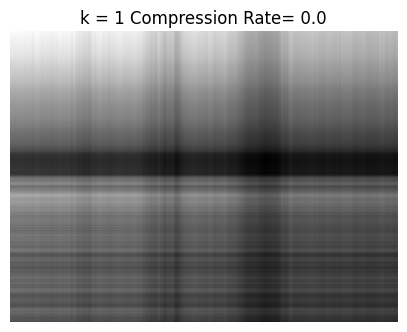

(960, 5) (5, 5) (5, 1280)


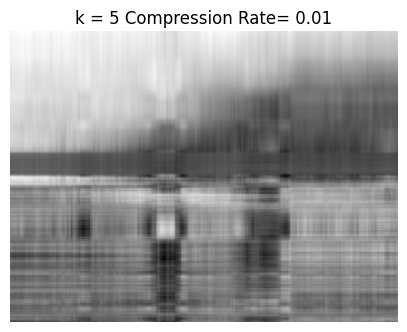

(960, 20) (20, 20) (20, 1280)


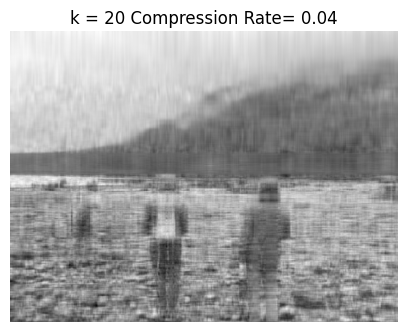

(960, 100) (100, 100) (100, 1280)


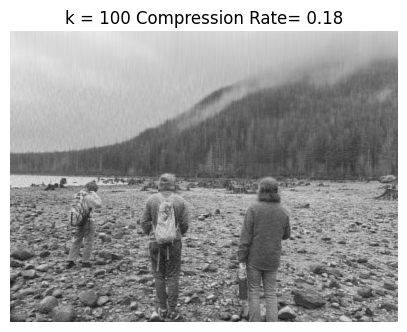

(960, 150) (150, 150) (150, 1280)


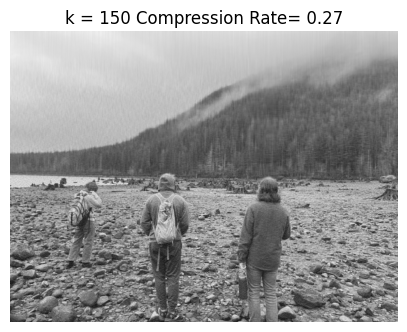

In [35]:
# Rank-k approximation for various rankings of k
k_approx = [1, 5, 20, 100, 150]

if len(S.shape) == 1:
  S = np.diag(S)
for k in k_approx:
  # Extract the top-k components
  U_k = U[:, :k]        # First k columns of U (m x k)
  S_k = S[0:k, 0:k]           # First k singular values (k x k)
  Vt_k = VT[:k, :]      # First k rows of Vt (k x n)
  print(U_k.shape, S_k.shape, Vt_k.shape)
  Xapprox = U_k @ S_k @ Vt_k

  compressed_parameters = k * (X.shape[0] + 1 + X.shape[1])
  space_saved = (parameters - compressed_parameters) / parameters
  compression_ratio = compressed_parameters / (parameters)

  img = plt.imshow(Xapprox)
  img.set_cmap('gray')
  plt.title('k = {} Compression Rate= {}'.format(k,round(compression_ratio,2)))
  plt.axis('off')
  plt.show()

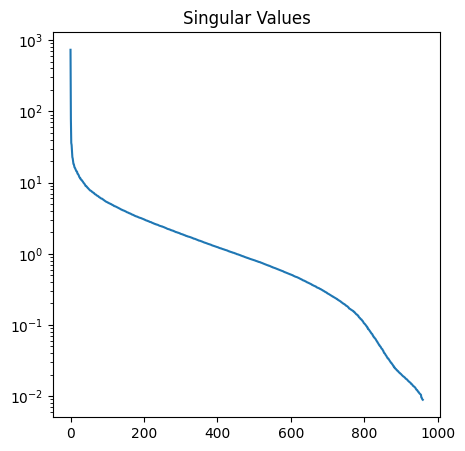

In [36]:
plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.show()

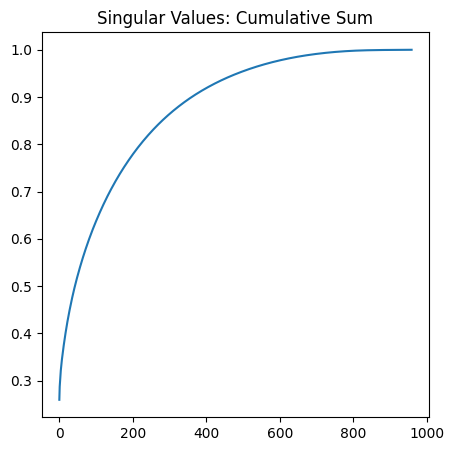

In [37]:
plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title("Singular Values: Cumulative Sum")
plt.show()

Save the U, S, Vt as numpy arrays

In [39]:
S_list = S.diagonal() # Only need the singular vectors
np.save('U.npy', U)
np.save('S.npy', S_list)
np.save('Vt.npy', VT)

In [ ]:
U = np.load('U.npy')
S_list = np.load('S.npy')
S = np.diag(S_list)
VT = np.load('Vt.npy')

print(f"U: {U.shape}, S: {S.shape}, Vt: {VT.shape}")
print(f"Rank: {np.linalg.matrix_rank(X)}")
print("Singular Values (Sigma):")
print(np.round(S, 2))

U: (28, 28), S: (28,), Vt: (28, 28)
Rank: 16
Singular Values (Sigma):
[20.98  4.51  3.09  2.56  1.92  1.48  1.32  1.09  0.95  0.77  0.68  0.66
  0.6   0.57  0.29  0.17  0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.  ]


## Color

Another example for a colorized image

In [48]:
image_path = 'images/joshua-tree/joshua-tree.png'

In [49]:
# Converts the original image to numpy array
if image_path.endswith(".jpeg") or image_path.endswith(".jpg"):
  # normalize to [0, 1]
  X = imread(image_path).astype(float) / 255.0
else:
  X = imread(image_path)

parameters = X.shape[0] * X.shape[1] * X.shape[2]
print(f"Image Shape: {X.shape}")
print(f"Parameters in Original Image: {parameters}")

Image Shape: (3024, 4032, 3)
Parameters in Original Image: 36578304


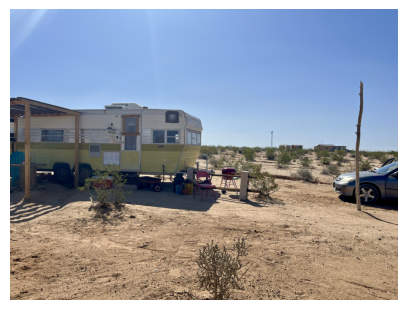

In [50]:
# Display the uncompressed image
img = plt.imshow(X)
plt.axis('off')
plt.show()

In [51]:
# Compute the SVD separately along each color dimension
U1, S1, VT1 = np.linalg.svd(X[:, :, 0], full_matrices = False) # Red
U2, S2, VT2 = np.linalg.svd(X[:, :, 1], full_matrices = False) # Green
U3, S3, VT3 = np.linalg.svd(X[:, :, 2], full_matrices = False) # Blue
# Note: SVD returns Sigma as a list of values, not a diagonal matrix, for efficiency.

print(f"U: {U1.shape}, S: {S1.shape}, Vt: {VT1.shape}")

U: (3024, 3024), S: (3024,), Vt: (3024, 4032)


(3024, 1) (1, 1) (1, 4032)


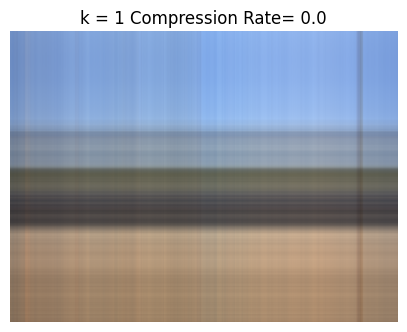

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.18082395..1.127072].


(3024, 5) (5, 5) (5, 4032)


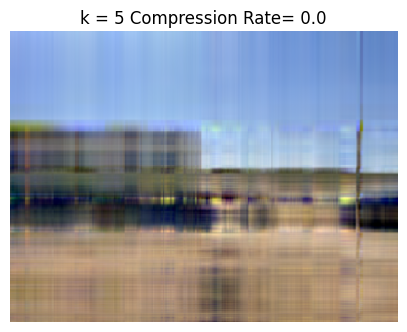

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.20937823..1.1725596].


(3024, 20) (20, 20) (20, 4032)


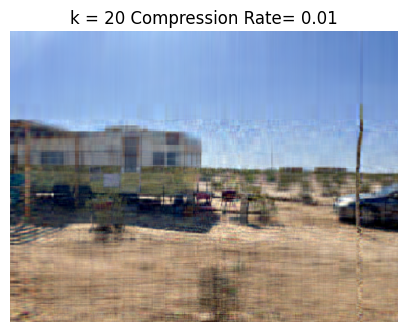

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.2431094..1.2384992].


(3024, 100) (100, 100) (100, 4032)


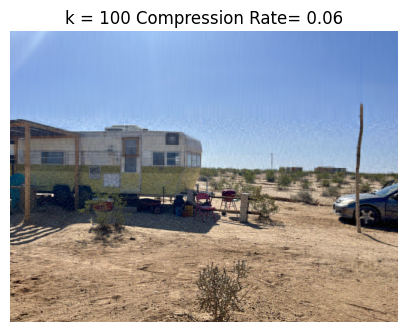

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.24763444..1.2470307].


(3024, 150) (150, 150) (150, 4032)


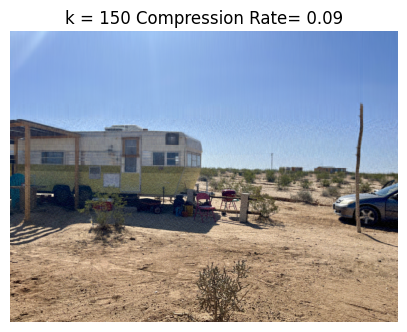

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.17028868..1.1681237].


(3024, 500) (500, 500) (500, 4032)


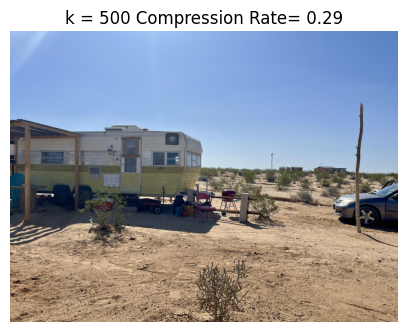

In [52]:
# Rank-k approximation for various rankings of k
k_approx = [1, 5, 20, 100, 150, 500]

if len(S1.shape) == 1:
  S1 = np.diag(S1)
if len(S2.shape) == 1:
  S2 = np.diag(S2)
if len(S3.shape) == 1:
  S3 = np.diag(S3)

for k in k_approx:
  # Extract the top-k components
  U1_k, S1_k, Vt1_k = U1[:, :k], S1[0:k, 0:k], VT1[:k, :]
  U2_k, S2_k, Vt2_k = U2[:, :k], S2[0:k, 0:k], VT2[:k, :]
  U3_k, S3_k, Vt3_k = U3[:, :k], S3[0:k, 0:k], VT3[:k, :]

  print(U1_k.shape, S1_k.shape, Vt1_k.shape)
  X1_approx = U1_k @ S1_k @ Vt1_k
  X2_approx = U2_k @ S2_k @ Vt2_k
  X3_approx = U3_k @ S3_k @ Vt3_k

  Xapprox = np.stack([X1_approx, X2_approx, X3_approx], axis=2)

  compressed_parameters = k * 3 * (X.shape[0] + 1 + X.shape[1])
  space_saved = (parameters - compressed_parameters) / parameters
  compression_ratio = compressed_parameters / (parameters)

  img = plt.imshow(Xapprox)
  img.set_cmap('gray')
  plt.title('k = {} Compression Rate= {}'.format(k,round(compression_ratio,2)))
  plt.axis('off')
  plt.show()

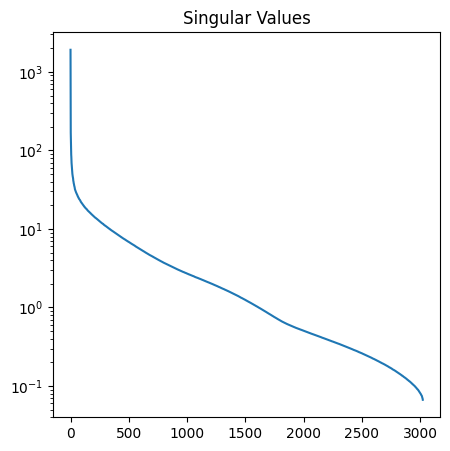

In [53]:
plt.figure(1)
plt.semilogy(np.diag(S1))
plt.title('Singular Values')
plt.show()

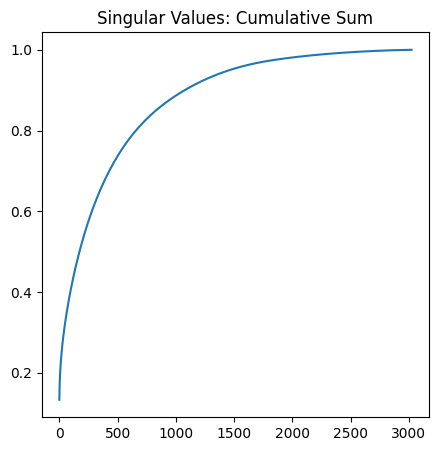

In [54]:
plt.figure(2)
plt.plot(np.cumsum(np.diag(S1))/np.sum(np.diag(S1)))
plt.title("Singular Values: Cumulative Sum")
plt.show()

Save U, S, Vt for each of RGB colors as numpy arrays

In [56]:
 # Only need the singular vectors
S1_list, S2_list, S3_list = S1.diagonal(), S2.diagonal(), S3.diagonal()

# Red
np.save('U1.npy', U1)
np.save('S1.npy', S1_list)
np.save('Vt1.npy', VT1)

# Green
np.save('U2.npy', U2)
np.save('S2.npy', S2_list)
np.save('Vt2.npy', VT2)

# Blue
np.save('U3.npy', U3)
np.save('S3.npy', S3_list)
np.save('Vt3.npy', VT3)

In [ ]:
U1, S1_list, VT1 = np.load('U1.npy'), np.load('S1.npy'), np.load('Vt1.npy')
U2, S2_list, VT2 = np.load('U2.npy'), np.load('S2.npy'), np.load('Vt2.npy')
U3, S3_list, VT3 = np.load('U3.npy'), np.load('S3.npy'), np.load('Vt3.npy')

S1, S2, S3 = np.diag(S1_list), np.diag(S2_list), np.diag(S3_list)

### Testing

In [29]:
S_list = np.load('S.npy')
print(S_list.shape)
print(S_list)

(28,)
[20.981417    4.5090914   3.0918076   2.5615366   1.923242    1.4804311
  1.3204895   1.0937105   0.94606644  0.770592    0.6823112   0.65616983
  0.6015416   0.56705034  0.29399672  0.17255522  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.        ]
